In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.shape

(614, 13)

In [6]:
train = data.copy()

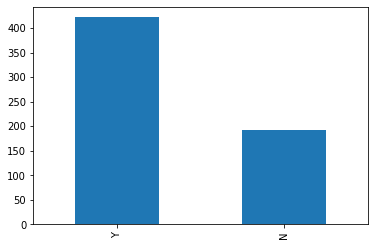

In [7]:
train['Loan_Status'].value_counts().plot.bar()

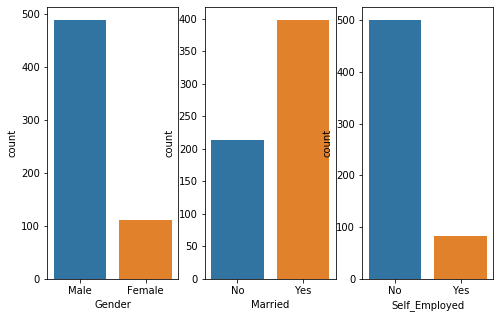

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
ax = ax.ravel()
sns.countplot(train['Gender'], ax=ax[0])
sns.countplot(train['Married'], ax=ax[1])
sns.countplot(train['Self_Employed'], ax=ax[2])


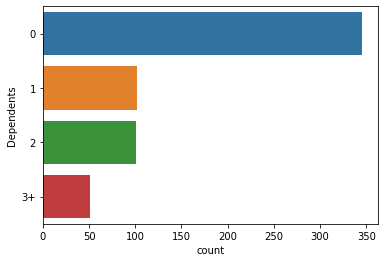

In [9]:
sns.countplot(y='Dependents', data=train)

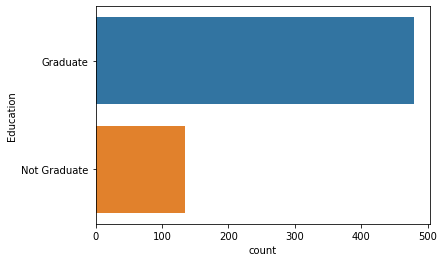

In [10]:
sns.countplot(y='Education', data=train)

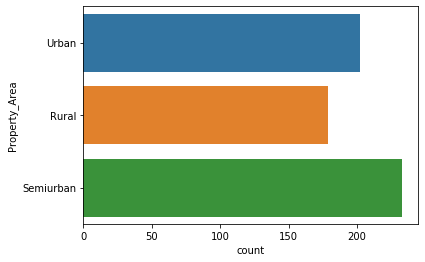

In [11]:
sns.countplot(y='Property_Area', data=train)

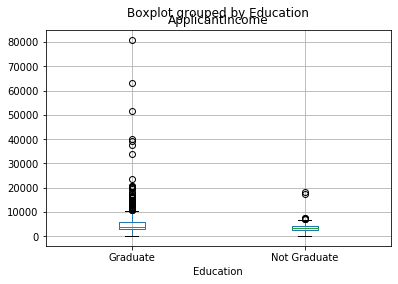

In [12]:
train.boxplot(column='ApplicantIncome', by='Education')

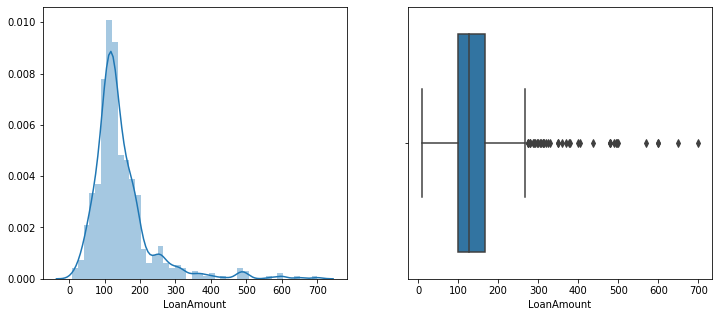

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = ax.ravel()
sns.distplot(train['LoanAmount'], ax=ax[0])
sns.boxplot(train['LoanAmount'])

In [14]:
def draw_stackedBar(column1, column2, data=train):
    ct = pd.crosstab(data[column1], data[column2])
    ct.plot.bar(stacked=True)
    plt.ylabel('Count');

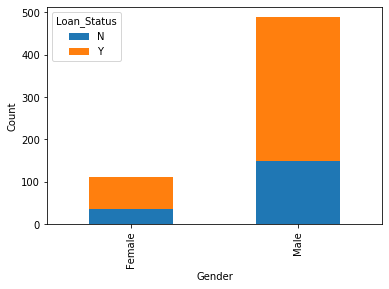

In [15]:
draw_stackedBar('Gender', 'Loan_Status')

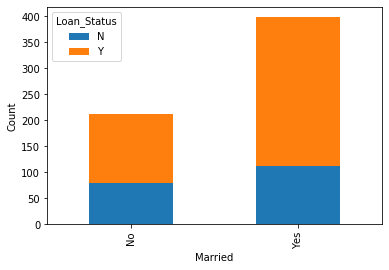

In [16]:
draw_stackedBar('Married', 'Loan_Status')

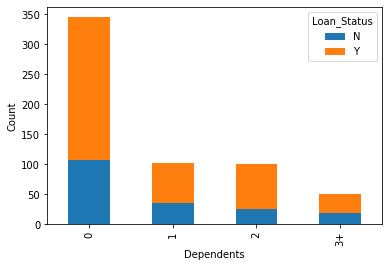

In [17]:
draw_stackedBar('Dependents', 'Loan_Status')

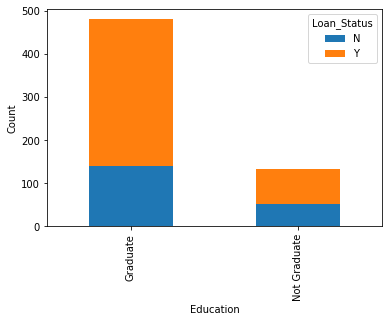

In [18]:
draw_stackedBar('Education', 'Loan_Status')

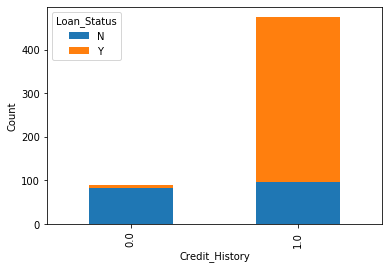

In [19]:
draw_stackedBar('Credit_History', 'Loan_Status')

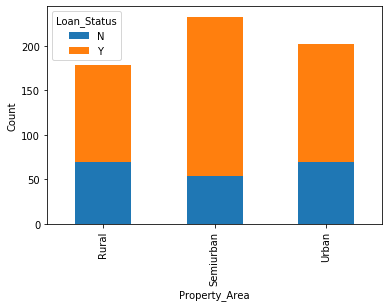

In [20]:
draw_stackedBar('Property_Area', 'Loan_Status')

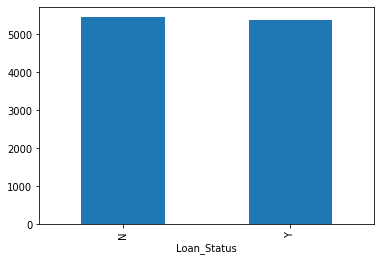

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

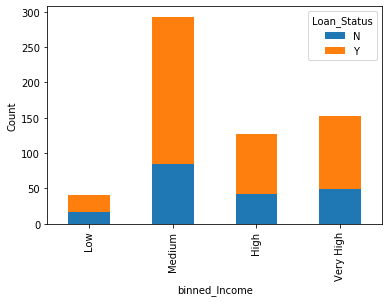

In [22]:
bins = [0, 2000, 4000, 5800, 81000]
labels = ['Low', 'Medium', 'High', 'Very High']
train['binned_Income'] = pd.cut(train['ApplicantIncome'], bins=bins, labels=labels)
draw_stackedBar('binned_Income', 'Loan_Status')

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

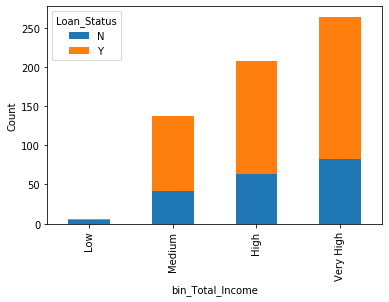

In [23]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['bin_Total_Income'] = pd.cut(train['Total_Income'], bins=bins, labels=labels)
draw_stackedBar('bin_Total_Income', 'Loan_Status')

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 

In [24]:
train=train.drop(['binned_Income', 'bin_Total_Income', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


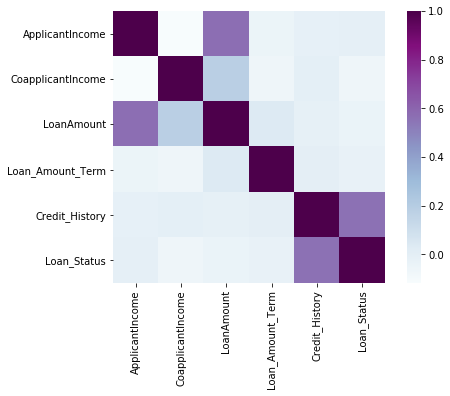

In [26]:
matrix = train.corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(matrix, square=True, cmap='BuPu');

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [30]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

 As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

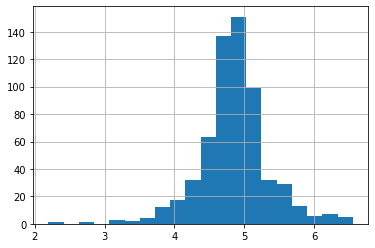

In [34]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Lets drop the Loan_ID variable as it does not has any effect on the target variable

In [35]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

## Logistic Regression

We will train a Logistic regression model to predict the binary outcome

In [38]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [44]:
x = pd.get_dummies(x, drop_first=True)

In [47]:
x_train, x_val, y_train, y_val = train_test_split(x, y , test_size = 0.25)

In [48]:
lr_model = LogisticRegression(C = 1.0)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_val)
print('Accuracy Score :', accuracy_score(y_val, y_pred))

Accuracy Score : 0.8246753246753247


## Logistic Regression using stratified k-folds cross validation

In [58]:
i = 1
scores = []
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_i, val_i in kf.split(x, y):
    print('\n{} of {} K fold'.format(i, kf.n_splits), end=' ')
    x_train, x_val = x.loc[train_i], x.loc[val_i]
    y_train, y_val = y.loc[train_i], y.loc[val_i]
    model = LogisticRegression(random_state = 1, max_iter=200).fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)
    print('accuracy score', score)
    i += 1

print('\nMean Accuracy :', np.mean(scores))


1 of 5 K fold accuracy score 0.8130081300813008

2 of 5 K fold accuracy score 0.8373983739837398

3 of 5 K fold accuracy score 0.7967479674796748

4 of 5 K fold accuracy score 0.8048780487804879

5 of 5 K fold accuracy score 0.7950819672131147
Mean Accuracy : 0.8094228975076636
